In [1]:
from pysegmt import *

%matplotlib inline

workDir="/ChangLab5-hd2/hannah/data/test/"
tomoFiles = list(glob(os.path.join(workDir,"tomograms","TS16_unblur_orig__bin4.hdf")))
segFiles = list(glob(os.path.join(workDir,"segmentations","*.pdb")))

tomoFile = tomoFiles[0]
segFile = segFiles[0]

In [18]:
def inFilCoords_search(filament, r=DEFAULT_RPIX, dim=DEFAULT_DIM, binFactor=None, mask=None):
    coords = (filament+0.5).astype(int) 
    n = filament.shape[0] # number of points defining the segmentation
    # apply binning if needed
    if binFactor is not None:
        filament = filament/binFactor
    print(filament)
    # no mask
    if mask is None:
        for x in range(dim[0]):
            for y in range(dim[1]):
                for z in range(dim[2]):
                    p = np.array([x,y,z])
                    # if the point is not already marked...
                    if not (coords == p).all(axis=1).any():
                        # for each pair of line segments...
                        for i in range(n-1):
                            # is the point near the sphere about the start segment point?
                            if np.linalg.norm(p+0.5 - filament[i]) <= r:
                                coords = np.append(coords,[p],axis=0)
                                print(p)
                                break
                            # is the point near the cylinder about the line formed by two segment points?
                            elif lineseg_dist(p+0.5, filament[i], filament[i+1]) <= r:
                                coords = np.append(coords,[p],axis=0)
                                print(p)
                                break
                        # is the point in the sphere about the end point
                        if np.linalg.norm(p+0.5 - filament[n-1]) <= r:
                            coords = np.append(coords,[p],axis=0)
    # apply mask
    else:
        # rescale mask if binFactor given
        if binFactor is not None:
            coordsMask = rescale(mask, filament = None, binFactor=binFactor, scaleDown=True)
        for x, y, z in coordsMask:
            p = np.array([x,y,z])
            # if the point is not already marked...
            if not (coords == p).all(axis=1).any():
                # for each pair of line segments...
                for i in range(n-1):
                    # is the point near the sphere about the start segment point?
                    if np.linalg.norm(p+0.5 - filament[i]) <= r:
                        coords = np.append(coords,[p],axis=0)
                        break
                    # is the point near the cylinder about the line formed by two segment points?
                    elif lineseg_dist(p+0.5, filament[i], filament[i+1]) <= r:
                        coords = np.append(coords,[p],axis=0)
                        break
                # is the point in the sphere about the end point
                if np.linalg.norm(p+0.5 - filament[n-1]) <= r:
                    coords = np.append(coords,[p],axis=0)
    coords = np.unique(coords, axis=0)
    # convert back into original coordinates for binning
    if binFactor is not None:
        coords = rescale(coords, filament=filament, binFactor=binFactor,scaleDown=False)
    return coords

/ChangLab5-hd2/hannah/pysegmt/pysegmt.py:215: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r = Rotation.align_vectors(vec1, vec2)


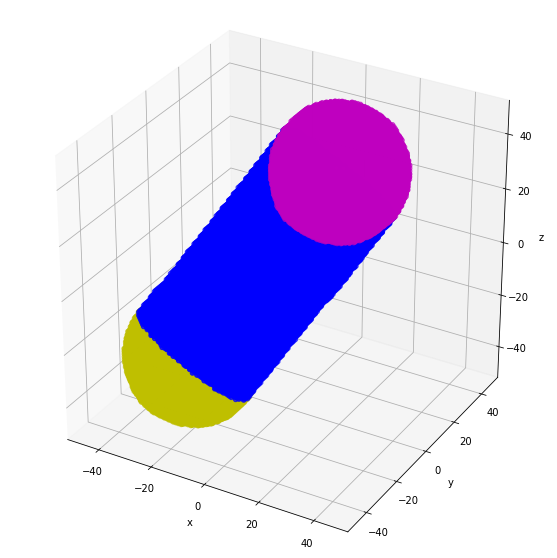

<Figure size 432x288 with 0 Axes>

In [2]:
start = np.array([-16,-32,-20])
end = np.array([15,8,37])
axLim = 50
r = DEFAULT_RPIX

cylCoords = genCylCoords(start,end,r)
sphCoords1 = genSphereCoords(start, r)
sphCoords2 = genSphereCoords(end, r)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(cylCoords[:,0],cylCoords[:,1],cylCoords[:,2], facecolors='b');
ax.scatter3D(sphCoords1[:,0],sphCoords1[:,1],sphCoords1[:,2], facecolors='y');
ax.scatter3D(sphCoords2[:,0],sphCoords2[:,1],sphCoords2[:,2], facecolors='m');
ax.scatter3D([start[0]],[start[1]],[start[2]], facecolors='g',s=100);
ax.scatter3D([end[0]],[end[1]],[end[2]], facecolors='r',s=100);
ax.set_box_aspect(aspect = (1,1,1))
ax.axes.set_xlim3d(left=-axLim, right=axLim) 
ax.axes.set_ylim3d(bottom=-axLim, top=axLim) 
ax.axes.set_zlim3d(bottom=-axLim, top=axLim)
ax.axes.set_xlabel("x")
ax.axes.set_ylabel("y")
ax.axes.set_zlabel("z")
plt.show()

plt.savefig("figures/construct.png")

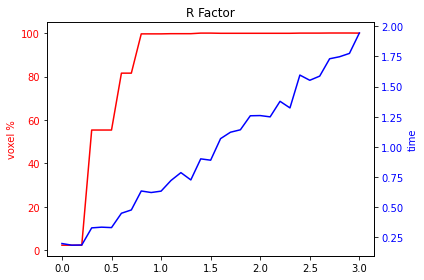

In [5]:
# R FACTOR CYLINDER

%matplotlib inline

n=31
y = np.zeros([n])
x = np.linspace(0,3,n)
t = np.zeros([n])
for i, xi in enumerate(x):
    start_time = time.time()
    y[i] = genCylCoords(start, end, r, rFactor=xi).shape[0]
    t[i] = time.time() - start_time
    
fig, ax1 = plt.subplots()

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1 = plt.axes()
ax1.set_title("R Factor")
ax1.plot(x,100*y/np.max(y), color="r")
ax1.set_ylabel('voxel %', color="r")
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx() 
ax2.plot(x,t, color="b")
ax2.set_ylabel('time', color="b")
ax2.tick_params(axis='y', labelcolor="b")

fig.tight_layout() 

plt.savefig('figures/RFactor_Cyl.png')

/ChangLab5-hd2/hannah/pysegmt/pysegmt.py:168: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r = Rotation.align_vectors(vec1, vec2)


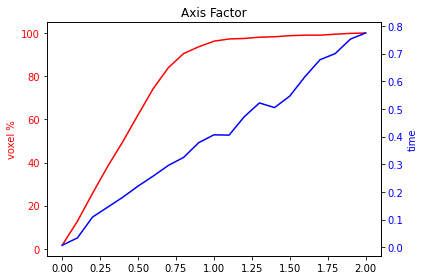

In [6]:
# AXIS FACTOR CYLINDER

%matplotlib inline

n=21
y = np.zeros([n])
x = np.linspace(0,2,n)
t = np.zeros([n])
for i, xi in enumerate(x):
    start_time = time.time()
    y[i] = genCylCoords(start, end, r, axisFactor=xi).shape[0]
    t[i] = time.time() - start_time
    
fig, ax1 = plt.subplots()

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1 = plt.axes()
ax1.set_title("Axis Factor")
ax1.plot(x,100*y/np.max(y), color="r")
ax1.set_ylabel('voxel %', color="r")
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx() 
ax2.plot(x,t, color="b")
ax2.set_ylabel('time', color="b")
ax2.tick_params(axis='y', labelcolor="b")

fig.tight_layout() 
plt.savefig('figures/AxisFactor_Cyl.png')

/ChangLab5-hd2/hannah/pysegmt/pysegmt.py:168: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r = Rotation.align_vectors(vec1, vec2)


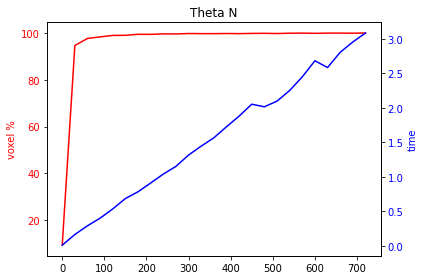

In [7]:
# THETA N CYLINDER

%matplotlib inline

n=25
y = np.zeros([n])
x = np.linspace(0,720,n,dtype=int)
t = np.zeros([n])
for i, xi in enumerate(x):
    start_time = time.time()
    y[i] = genCylCoords(start, end, r, thetaN=xi).shape[0]
    t[i] = time.time() - start_time
    
fig, ax1 = plt.subplots()

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1 = plt.axes()
ax1.set_title("Theta N")
ax1.plot(x,100*y/np.max(y), color="r")
ax1.set_ylabel('voxel %', color="r")
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx() 
ax2.plot(x,t, color="b")
ax2.set_ylabel('time', color="b")
ax2.tick_params(axis='y', labelcolor="b")

fig.tight_layout() 

plt.savefig('figures/ThetaN_Cyl.png')

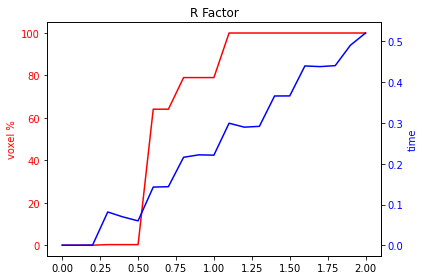

In [8]:
# R FACTOR SPHERE

%matplotlib inline

n=21
y = np.zeros([n])
x = np.linspace(0,2,n)
t = np.zeros([n])
for i, xi in enumerate(x):
    start_time = time.time()
    y[i] = genSphereCoords(start, r, rFactor=xi).shape[0]
    t[i] = time.time() - start_time
    
fig, ax1 = plt.subplots()

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1 = plt.axes()
ax1.set_title("R Factor")
ax1.plot(x,100*y/np.max(y), color="r")
ax1.set_ylabel('voxel %', color="r")
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx() 
ax2.plot(x,t, color="b")
ax2.set_ylabel('time', color="b")
ax2.tick_params(axis='y', labelcolor="b")

fig.tight_layout() 

plt.savefig('figures/RFactor_Sphere.png')

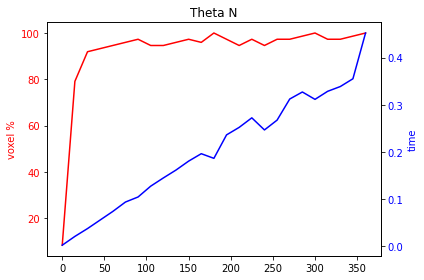

In [9]:
# THETA N SPHERE

%matplotlib inline

n=25
y = np.zeros([n])
x = np.linspace(0,360,n,dtype=int)
t = np.zeros([n])
for i, xi in enumerate(x):
    start_time = time.time()
    y[i] = genSphereCoords(start, r, thetaN=xi).shape[0]
    t[i] = time.time() - start_time
    
fig, ax1 = plt.subplots()

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1 = plt.axes()
ax1.set_title("Theta N")
ax1.plot(x,100*y/np.max(y), color="r")
ax1.set_ylabel('voxel %', color="r")
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx() 
ax2.plot(x,t, color="b")
ax2.set_ylabel('time', color="b")
ax2.tick_params(axis='y', labelcolor="b")

fig.tight_layout() 

plt.savefig('figures/ThetaN_Sphere.png')

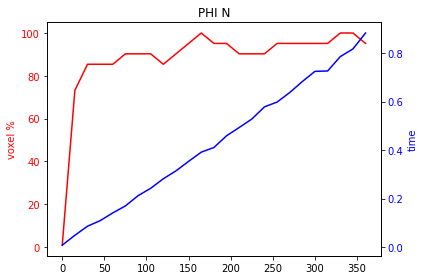

In [10]:
# PHI N SPHERE

%matplotlib inline

n=25
y = np.zeros([n])
x = np.linspace(0,360,n,dtype=int)
t = np.zeros([n])
for i, xi in enumerate(x):
    start_time = time.time()
    y[i] = genSphereCoords(start, r, thetaN=180, phiN=xi).shape[0]
    t[i] = time.time() - start_time
    
fig, ax1 = plt.subplots()

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1 = plt.axes()
ax1.set_title("PHI N")
ax1.plot(x,100*y/np.max(y), color="r")
ax1.set_ylabel('voxel %', color="r")
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx() 
ax2.plot(x,t, color="b")
ax2.set_ylabel('time', color="b")
ax2.tick_params(axis='y', labelcolor="b")

fig.tight_layout() 

plt.savefig('figures/PhiN_Sphere.png')